# Improts

In [1]:
import warnings


warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# import nilearn as nl
# import nibabel as nib
# import nilearn.plotting as nlplt
import pickle

from tqdm import tqdm 
from skimage.filters import try_all_threshold, threshold_otsu, threshold_isodata, threshold_local
from skimage.morphology import binary_closing, binary_opening, binary_erosion, binary_dilation
from utils import *

# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score
from skimage.metrics import hausdorff_distance
# from scipy.ndimage import median_filter, uniform_filter, maximum_filter, generic_filter, minimum_filter
# from skimage.filters import rank
# from skimage.morphology import disk, ball

# Data upload

In [2]:
training_set = [87, 246, 264,  79,  56, 170, 192, 154, 161, 136, 117,  17, 152,
                48, 283, 157, 221, 260, 252, 231, 269,  90,  22,  37, 343, 330,
                271, 290, 308,  74, 275,   6,  80,  68,  11,  46,  53, 166, 180,
                110, 323, 368, 255, 332, 193, 349,  18, 336, 143,  64, 329, 177,
                312, 266,  85, 242, 262,  65,  28, 147, 122,  19, 331,  45, 135,
                200, 159, 222,  78, 236,   9, 172, 206, 220,  62, 105, 292, 203,
                205, 241, 178, 113, 102,  76, 239, 310, 174, 334, 251, 139, 268,
                115, 212, 356,  49, 169,  55, 210, 214, 118]

validation_set = [67, 107,  89, 276, 109, 199, 352,  51, 326, 165,  92, 286, 244,
                  142, 281, 132, 365, 176, 128, 333,  63, 209, 191, 164, 106,  61,
                  120, 259, 263, 146]

In [3]:
results = pd.read_csv("final_results.csv")
results

,patients,svm_dsc,kmeans_dsc,svm_hausdorf,kmeans_hausdorf,otsu_dsc,otsu_hausdorf,isodata_dsc,isodata_hausdorf,rand_forest_dsc,rand_forest_hausdorf
0,67,0.914978,0.646134,67.178866,81.993902,0.844295,74.859869,0.847810,74.424458,0.530236,29.291637
1,107,0.775739,0.393338,65.764732,81.841310,0.653541,69.814039,0.396330,70.632854,0.648267,32.031235
2,89,0.745096,0.367927,47.265209,68.571131,0.000000,92.141196,0.000000,92.141196,0.557593,34.190642
3,276,0.845570,0.574127,51.361464,87.567117,0.434216,70.149840,0.000000,70.149840,0.742456,77.077883
4,109,0.855228,0.279574,63.851390,83.360662,0.754165,79.259069,0.684880,79.259069,0.399039,63.647467
5,199,0.889734,0.736565,50.675438,88.938181,0.851913,85.076436,0.744576,85.076436,0.888991,83.815273
6,352,0.481132,0.301972,90.011110,117.328598,0.305449,117.132404,0.264727,117.770964,0.652776,85.052925
7,51,0.908528,0.622120,47.686476,82.443920,0.813963,77.942286,0.845990,74.779676,0.728836,21.213203
8,326,0.825418,0.694230,45.486262,68.073490,0.672982,63.960926,0.456494,63.960926,0.775347,58.532043
9,165,0.868318,0.650054,59.110067,74.799733,0.881815,54.378304,0.732461,54.378304,0.921417,53.563047


Available models:
* `svm_gpu_4cls_std_train.pkl`
    * 800 sampled points 
    * 100 trained patients
    * 4 class one vs all classification 
    * features: intensities + mean + std + skeweness + kurtosos features for all 4 modalities (20 in total)

In [4]:
svm_model = pickle.load(open("svm_gpu_4cls_std_train.pkl", 'rb'))

In [5]:
test_patient = 132
training_set = True

if training_set:
    brats_path = 'BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'
    dataset_part = "_Training_"
else:
    brats_path = 'BraTS2020_ValidationData/MICCAI_BraTS2020_ValidationData/'
    dataset_part="_Validation_"


# Patient Test

`feature_extractor_1` - features: intensities + mean + std + skeweness + kurtosos features for all 4 modalities (20 in total)

In [6]:
patient_data = retrieve_brats_data([test_patient], ['t1', 't2', 't1ce', 'flair'], dataset_part=dataset_part, brats_path=brats_path)

# predicted_mask = post_process(evaluate_brain(patient_data[0], feature_extractor_1, svm_model, False, 3))
predicted_mask = np.load(f'svm_training_masks/{test_patient}.npy') #svm_validation_masks

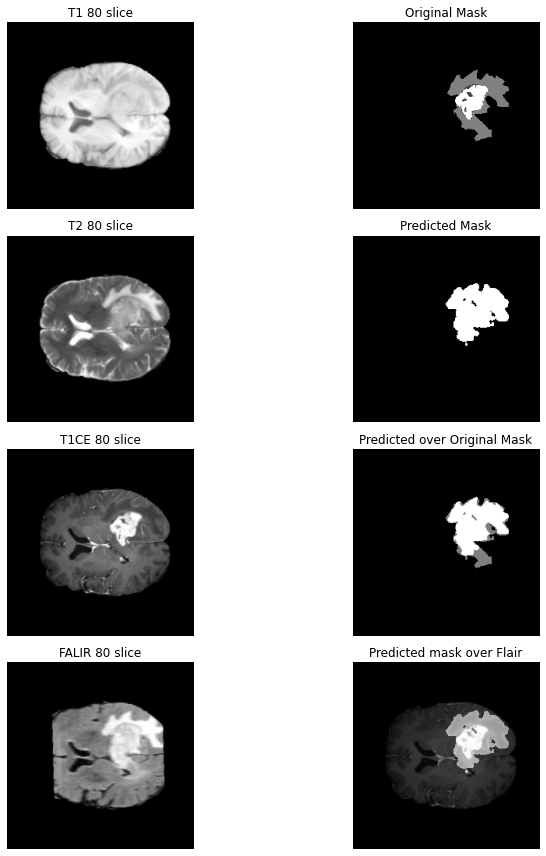

In [7]:
plot_results(patient_data, predicted_mask, 80)


In [8]:
print("Dice score: ", dice_score(predicted_mask, patient_data[0, 0]))
print("Hausdorf distance: ", hausdorff_distance(
    predicted_mask, patient_data[0, 0]))


Dice score:  0.8445542875912564
Hausdorf distance:  71.07038764492565


# Calculating masks for some validation patients and storing them

In [9]:
for vp in tqdm(set(np.random.randint(1, 125,19))):
    patient_data = retrieve_brats_data([vp], ['t1', 't2', 't1ce', 'flair'], dataset_part=dataset_part, brats_path=brats_path)

    predicted_mask = post_process(evaluate_brain(patient_data[0], feature_extractor_1, svm_model, False, 3))
    np.save(f'svm_validation_masks/{vp}.npy',predicted_mask)

  0%|          | 0/17 [00:00<?, ?it/s]

Feature Extraction...
Prediction...
Compiling the predicted mask...


  6%|▌         | 1/17 [07:47<2:04:44, 467.79s/it]

Feature Extraction...
Prediction...
Compiling the predicted mask...


 12%|█▏        | 2/17 [17:07<2:10:24, 521.63s/it]

Feature Extraction...
Prediction...
Compiling the predicted mask...


 18%|█▊        | 3/17 [27:23<2:11:49, 565.00s/it]

Feature Extraction...
Prediction...
Compiling the predicted mask...


 24%|██▎       | 4/17 [38:37<2:11:41, 607.79s/it]

Feature Extraction...
Prediction...
Compiling the predicted mask...


 29%|██▉       | 5/17 [49:23<2:04:18, 621.54s/it]

Feature Extraction...
Prediction...


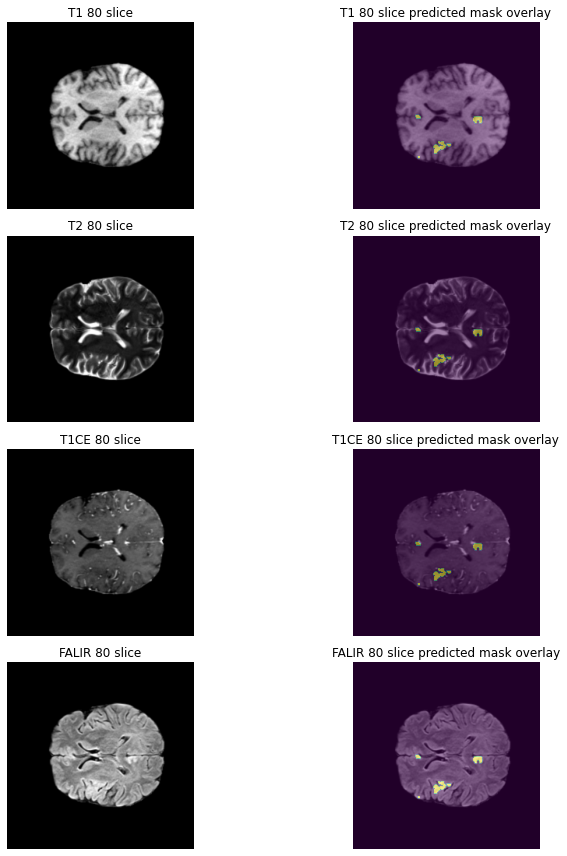

In [10]:
plot_results_for_validation(patient_data, predicted_mask,80)

In [24]:
results = results.set_index('patients')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


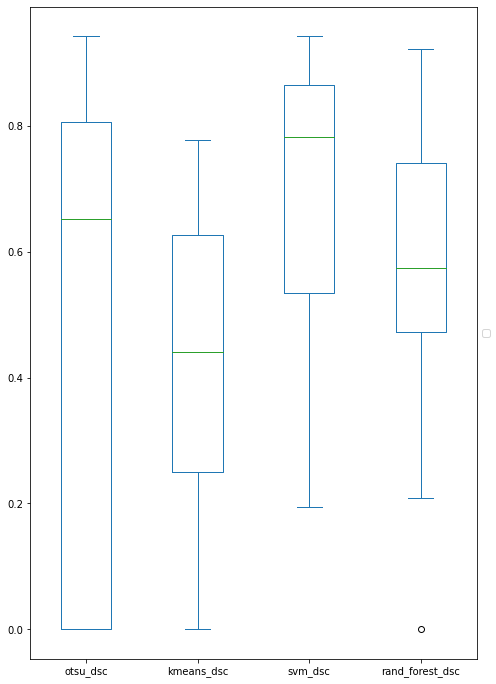

In [46]:
results[['otsu_dsc', 'kmeans_dsc', 'svm_dsc', 'rand_forest_dsc']].plot.box(figsize=(8, 12))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

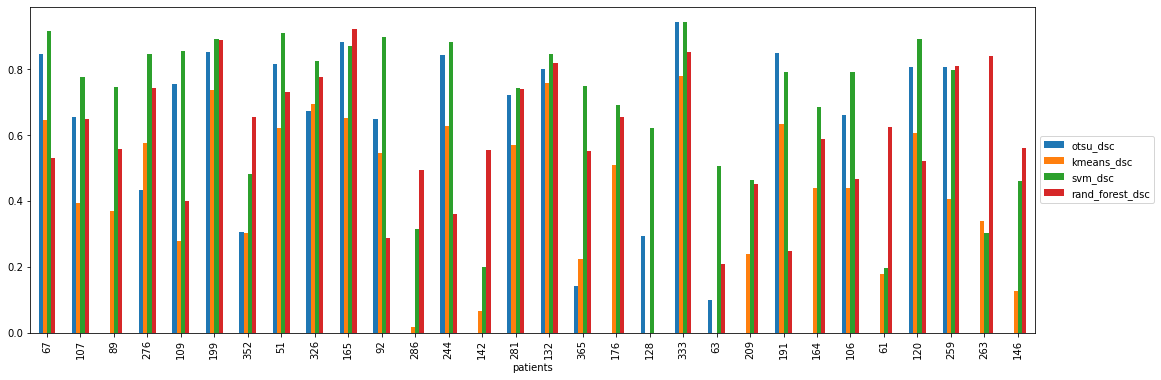

In [35]:
results[['otsu_dsc', 'kmeans_dsc', 'svm_dsc', 'rand_forest_dsc']].plot.bar(figsize=(18, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [32]:
print(results['rand_forest_dsc'].mean(), '+-', results['rand_forest_dsc'].std())

0.5823500482422369 +- 0.21881654104021261
